In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !unzip -o 'Churn_Modelling.zip'
data = pd.read_csv('Churn_Modelling.csv')
alvo = 'Exited'


In [2]:
data.head()
#data['Failure Type'].value_counts()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop_duplicates(inplace = True)
eliminar = ['RowNumber','CustomerId','Surname']
data.drop(columns = eliminar, inplace = True)


In [4]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [6]:
data[alvo].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data["Gender"].replace(to_replace = dict(Female = 0, Male = 1), inplace = True)
data['Geography'].replace(to_replace = dict(Spain = 0, France = 1, Germany = 2), inplace = True)

In [8]:
#data.drop(columns = ['Gender','Geography'], inplace = True)

X = data.drop(columns=alvo)
y= data[alvo]

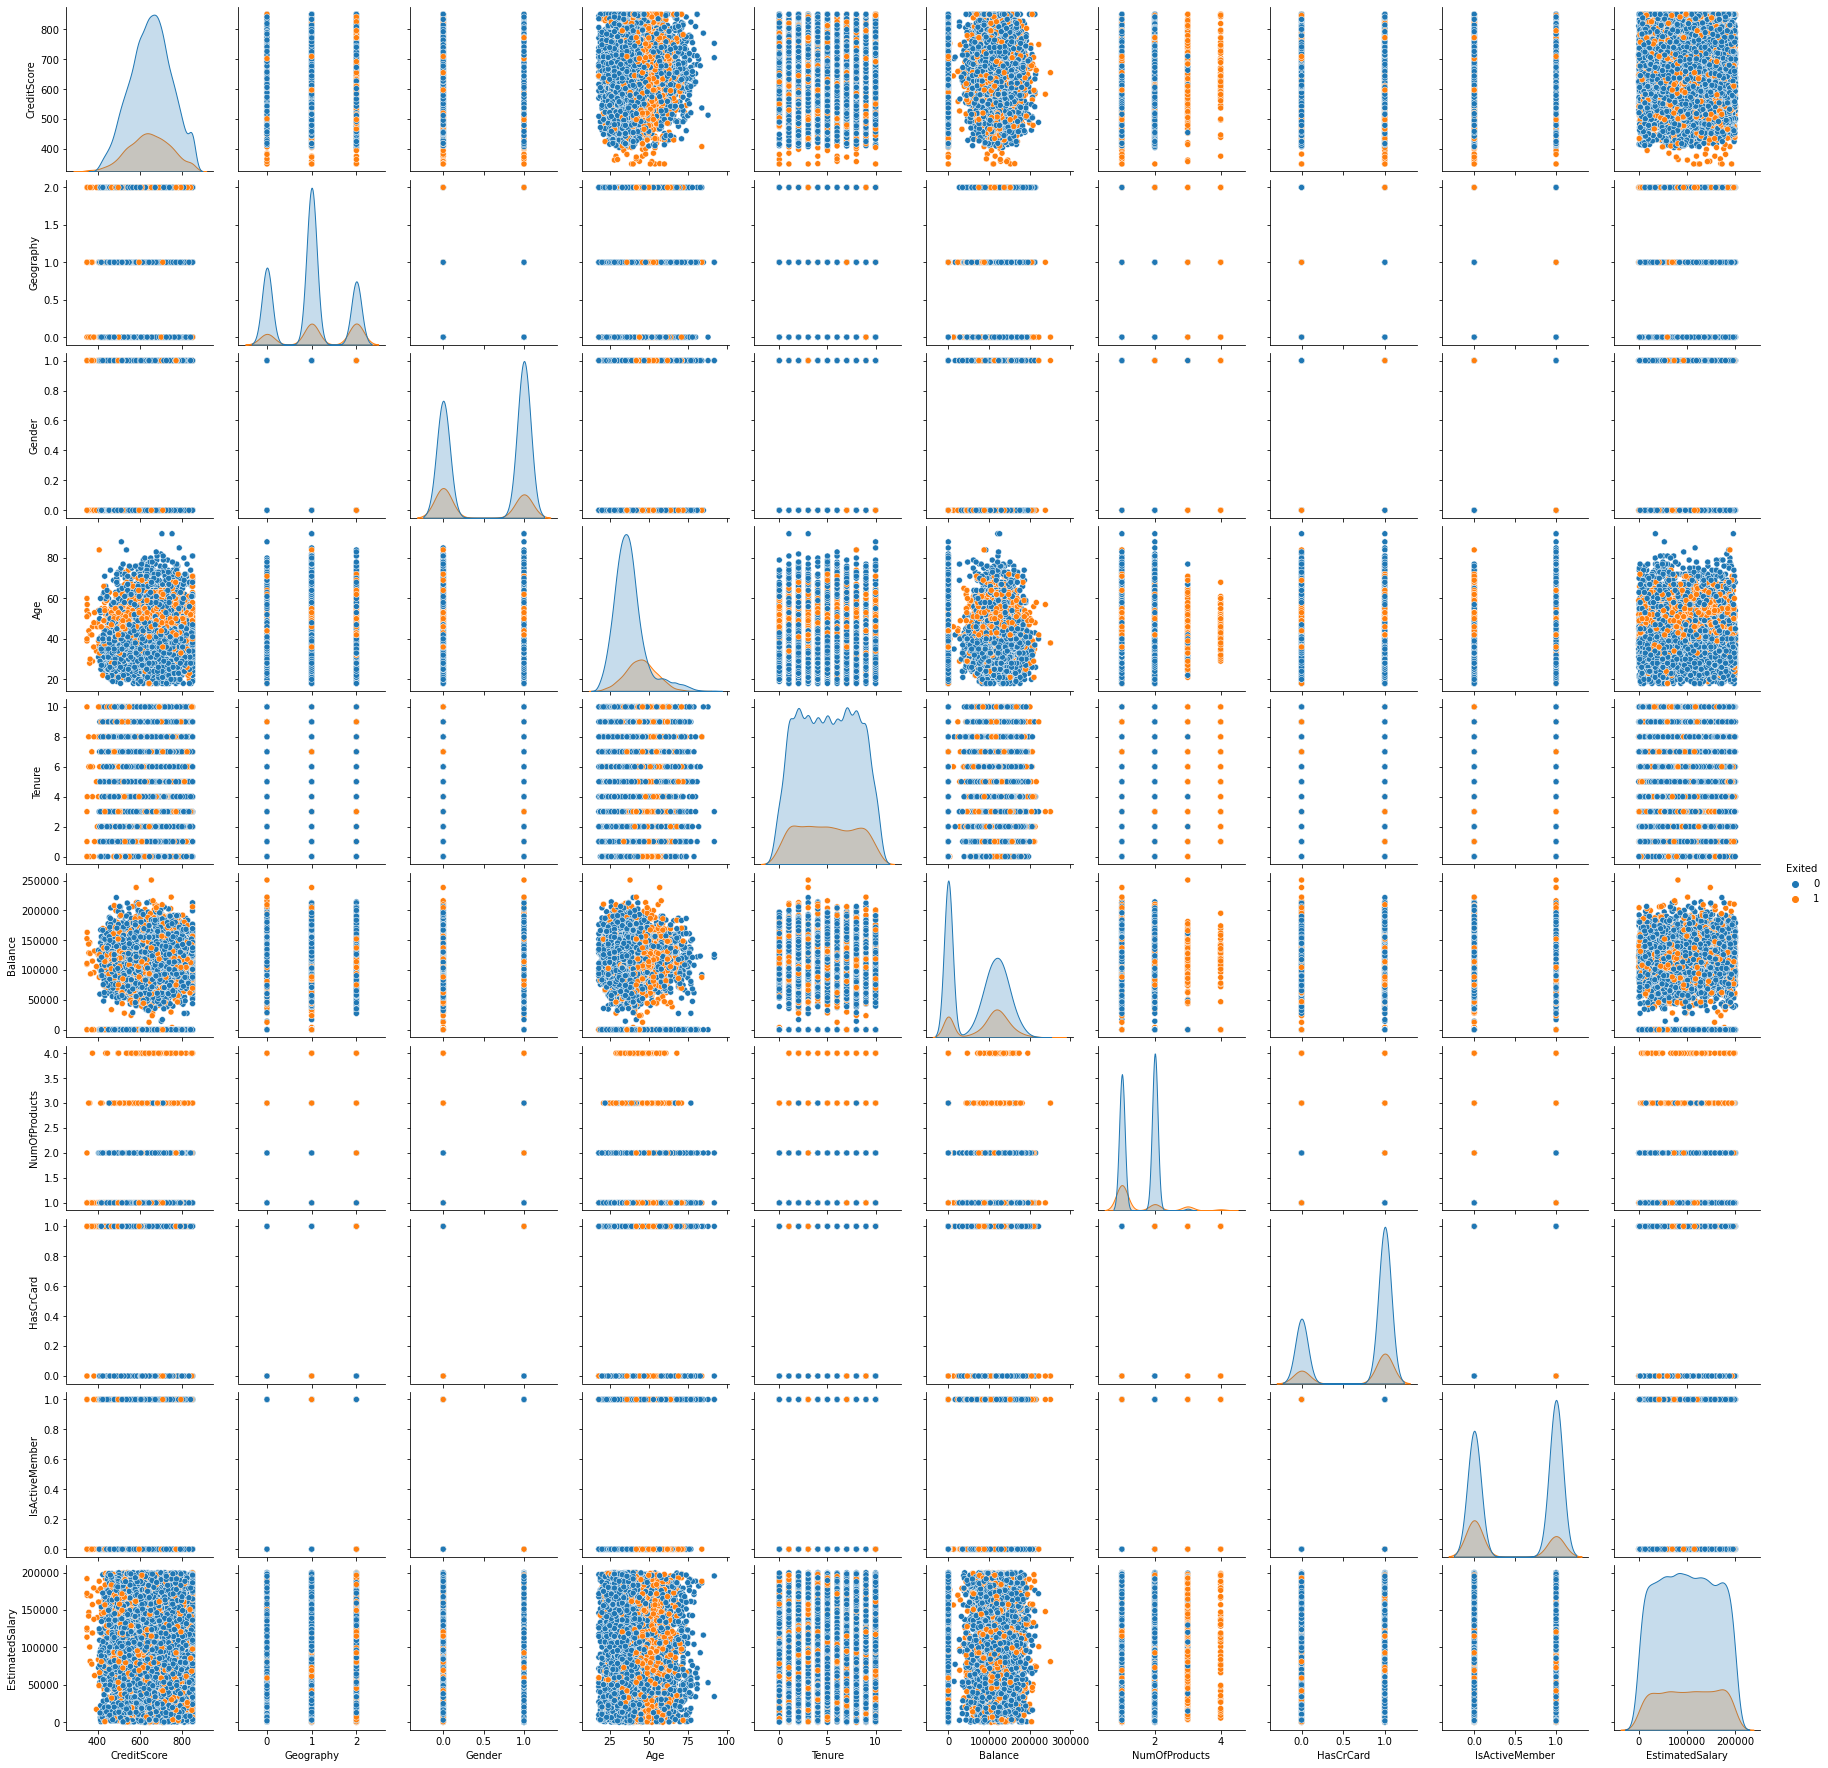

In [10]:
sns.pairplot(data = data, hue = alvo)

In [11]:
correlacoes_alvo = data.corr()
correlacoes_alvo
#correlacoes_alvo[alvo].sort_values(ascending=False)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.000478,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.000478,1.000000,-0.025446,0.029824,-0.002713,0.328736,-0.011923,0.014734,-0.022807,0.010285,0.138714
Gender,-0.002857,-0.025446,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.029824,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.002713,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.328736,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.011923,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.014734,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,-0.022807,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,0.010285,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
#usaremos class_weight='balanced' para balancear, pois:
# The “balanced” mode uses the values of y to automatically adjust weights
# inversely proportional to class frequencies in the input data
# as n_samples / (n_classes * np.bincount(y)).

In [13]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, \
      confusion_matrix, roc_curve, roc_auc_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression()
modeloB = LogisticRegression(class_weight='balanced')
reg  = modelo.fit(X_train, y_train)
regB = modeloB.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[1573   34]
 [ 365   28]]
              precision    recall  f1-score   support

           0      0.812     0.979     0.887      1607
           1      0.452     0.071     0.123       393

    accuracy                          0.800      2000
   macro avg      0.632     0.525     0.505      2000
weighted avg      0.741     0.800     0.737      2000



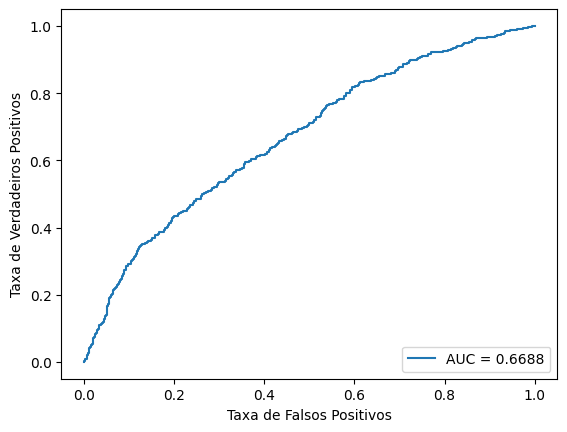

In [14]:
# Calculando as probabilidades previstas pelo modelo
y_pred_prob = reg.predict_proba(X_test)
probab_y_pred_ser_1 = y_pred_prob[:,1]

taxa_falsos_positivos, taxa_verdadeiros_positivos, _ = roc_curve(y_test,  probab_y_pred_ser_1)
auc = roc_auc_score(y_test, probab_y_pred_ser_1)

plt.plot(taxa_falsos_positivos,taxa_verdadeiros_positivos, label = "AUC = " + str(round(auc,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

In [16]:
# Usando o modelo balanceado
y_predB = regB.predict(X_test)
print(confusion_matrix(y_test,y_predB))
print(classification_report(y_test, y_predB, digits=3))

[[1028  579]
 [ 135  258]]
              precision    recall  f1-score   support

           0      0.884     0.640     0.742      1607
           1      0.308     0.656     0.420       393

    accuracy                          0.643      2000
   macro avg      0.596     0.648     0.581      2000
weighted avg      0.771     0.643     0.679      2000



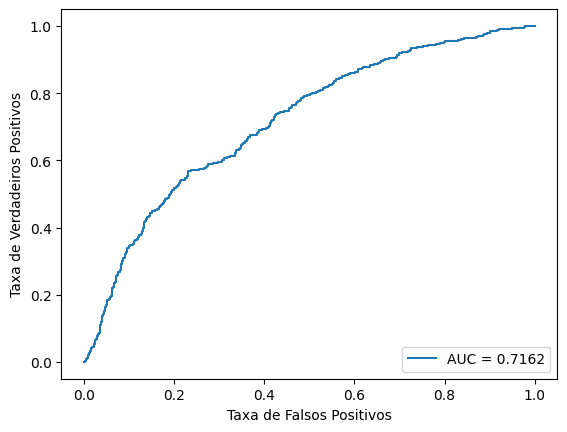

In [17]:
# Calculando as probabilidades previstas pelo modelo balanceado
y_predB_prob = regB.predict_proba(X_test)
probab_y_predB_ser_1 = y_predB_prob[:,1]

taxa_falsos_positivosB, taxa_verdadeiros_positivosB, _ = roc_curve(y_test,  probab_y_predB_ser_1)
aucB = roc_auc_score(y_test, probab_y_predB_ser_1)

plt.plot(taxa_falsos_positivosB,taxa_verdadeiros_positivosB, label = "AUC = " + str(round(aucB,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0      0.885     0.960     0.921      1607
           1      0.750     0.489     0.592       393

    accuracy                          0.868      2000
   macro avg      0.817     0.724     0.756      2000
weighted avg      0.858     0.868     0.856      2000



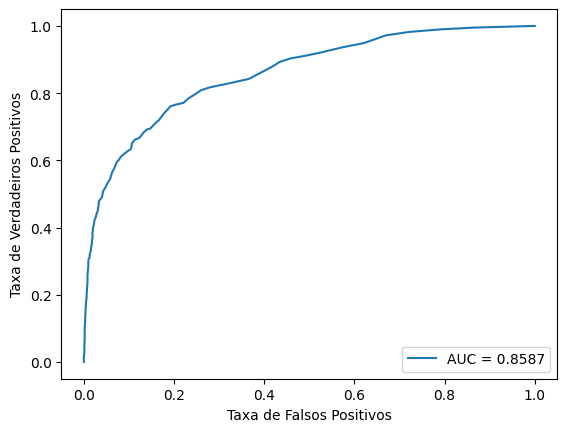

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test, y_pred_rfc, digits=3))

# Calculando as probabilidades previstas pelo modelo
y_pred_rfc_prob = rfc.predict_proba(X_test)
probab_y_pred_rfc_ser_1 = y_pred_rfc_prob[:,1]

taxa_falsos_positivos_rfc, taxa_verdadeiros_positivos_rfc, _ = roc_curve(y_test,  probab_y_pred_rfc_ser_1)
auc_rfc = roc_auc_score(y_test, probab_y_pred_rfc_ser_1)

plt.plot(taxa_falsos_positivos_rfc,taxa_verdadeiros_positivos_rfc, label = "AUC = " + str(round(auc_rfc,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

In [28]:
#%%time
from sklearn.model_selection import GridSearchCV


params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 3, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(rfc, params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50, 100],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='roc_auc')

In [31]:
best_params = grid_search.best_params_
print('Melhores parâmetros: ', best_params)

accuracy = grid_search.score(X_test, y_test)
print('Score: ', accuracy)

Melhores parâmetros:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10}
Score:  0.8676353928661342


[[1405  202]
 [ 118  275]]
              precision    recall  f1-score   support

           0      0.923     0.874     0.898      1607
           1      0.577     0.700     0.632       393

    accuracy                          0.840      2000
   macro avg      0.750     0.787     0.765      2000
weighted avg      0.855     0.840     0.846      2000



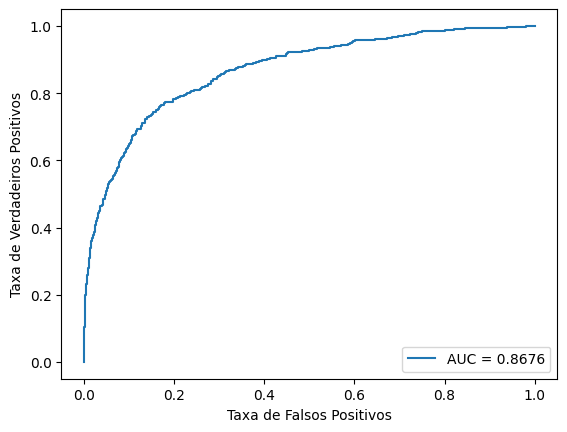

In [32]:
rfc_gs = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=10)
rfc_gs.fit(X_train, y_train)

y_pred_rfc_gs = rfc_gs.predict(X_test)
print(confusion_matrix(y_test,y_pred_rfc_gs))
print(classification_report(y_test, y_pred_rfc_gs, digits=3))

# Calculando as probabilidades previstas pelo modelo
y_pred_rfc_gs_prob = rfc_gs.predict_proba(X_test)
probab_y_pred_rfc_gs_ser_1 = y_pred_rfc_gs_prob[:,1]

taxa_falsos_positivos_rfc_gs, taxa_verdadeiros_positivos_rfc_gs, _ = roc_curve(y_test,  probab_y_pred_rfc_gs_ser_1)
auc_rfc_gs = roc_auc_score(y_test, probab_y_pred_rfc_gs_ser_1)

plt.plot(taxa_falsos_positivos_rfc_gs,taxa_verdadeiros_positivos_rfc_gs, label = "AUC = " + str(round(auc_rfc_gs,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()